In [1]:
!pip install -U fastai
!pip install -U kaggle
!pip install -U matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [5]:
from google.colab import files
files.upload()  # Burada az önce indirdiğin `kaggle.json` dosyasını yükle


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tunabarankurun","key":"949ad11fc34c7d8b2b6f2da85a6cf719"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip -q skin-cancer-mnist-ham10000.zip -d skin_data/


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [01:36<00:00, 26.2MB/s]
100% 5.20G/5.20G [01:36<00:00, 57.7MB/s]


In [8]:
!unzip -q /content/skin-cancer-mnist-ham10000.zip -d /content/skin_data/


replace /content/skin_data/HAM10000_images_part_1/ISIC_0024306.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [9]:
from pathlib import Path

# Verinin bulunduğu ana dizini belirtelim
data_path = Path("/content/skin_data")

# Dizin yapısını inceleyelim
print("📁 Ana dizin içeriği:")
for item in data_path.iterdir():
    print(item)

# Alt klasörlerden bazılarını kontrol edelim (örn: HAM10000_images_part_1)
images_part1 = data_path / "HAM10000_images_part_1"
images_part2 = data_path / "HAM10000_images_part_2"

print("\n📷 İlk 5 Görsel - Part 1:")
print(list(images_part1.glob("*.jpg"))[:5])

print("\n📷 İlk 5 Görsel - Part 2:")
print(list(images_part2.glob("*.jpg"))[:5])


📁 Ana dizin içeriği:
/content/skin_data/HAM10000_images_part_2
/content/skin_data/hmnist_8_8_L.csv
/content/skin_data/hmnist_28_28_L.csv
/content/skin_data/hmnist_8_8_RGB.csv
/content/skin_data/HAM10000_metadata.csv
/content/skin_data/hmnist_28_28_RGB.csv
/content/skin_data/ham10000_images_part_2
/content/skin_data/HAM10000_images_part_1
/content/skin_data/ham10000_images_part_1

📷 İlk 5 Görsel - Part 1:
[PosixPath('/content/skin_data/HAM10000_images_part_1/ISIC_0025755.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_1/ISIC_0028307.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_1/ISIC_0027353.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_1/ISIC_0028099.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_1/ISIC_0028199.jpg')]

📷 İlk 5 Görsel - Part 2:
[PosixPath('/content/skin_data/HAM10000_images_part_2/ISIC_0031357.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_2/ISIC_0033226.jpg'), PosixPath('/content/skin_data/HAM10000_images_part_2/

 Tüm dosyalar sorunsuz yüklenmiş Şimdi CSV’den etiket bilgilerini çekip veri çerçevesini hazırlayacağım:

In [10]:
import pandas as pd

# Metadata dosyasını yükleyelim
meta_path = data_path / "HAM10000_metadata.csv"
metadata = pd.read_csv(meta_path)

print("📄 Metadata İlk 5 Satır:")
print(metadata.head())

print("\n🧾 Eşsiz Tanı (lesion types):")
print(metadata["dx"].unique())

print("\n🔢 Toplam Görsel Sayısı:", len(metadata))


📄 Metadata İlk 5 Satır:
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

🧾 Eşsiz Tanı (lesion types):
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

🔢 Toplam Görsel Sayısı: 10015


Mükemmel, veri eksiksiz! Etiketler şu an kısaltma, bunların tam anlamlarını da ekleyelim ki rapor ve analizlerde açıklayıcı olsun.

In [11]:
# Etiket Açıklamaları
label_map = {
    'nv': 'Melanocytic Nevi (Benign)',
    'mel': 'Melanoma (Malignant)',
    'bkl': 'Benign Keratosis-like Lesions (Benign)',
    'bcc': 'Basal Cell Carcinoma (Malignant)',
    'akiec': 'Actinic Keratoses and Intraepithelial Carcinoma (Malignant)',
    'vasc': 'Vascular Lesions (Benign)',
    'df': 'Dermatofibroma (Benign)'
}

# Etiketleri açıklamalı hale getirelim
metadata['dx_full'] = metadata['dx'].map(label_map)

print(metadata[['dx', 'dx_full']].drop_duplicates())


         dx                                            dx_full
0       bkl             Benign Keratosis-like Lesions (Benign)
64       nv                          Melanocytic Nevi (Benign)
1095     df                            Dermatofibroma (Benign)
1211    mel                               Melanoma (Malignant)
2320   vasc                          Vascular Lesions (Benign)
2462    bcc                   Basal Cell Carcinoma (Malignant)
9687  akiec  Actinic Keratoses and Intraepithelial Carcinom...


test ve veri setini ayırmak 80 e 20

In [12]:
from sklearn.model_selection import train_test_split

# Etiketli DataFrame'in tam dosya yollarını da ekleyelim
metadata['image_path'] = metadata['image_id'].apply(
    lambda x: f"/content/skin_data/HAM10000_images_part_1/{x}.jpg"
    if Path(f"/content/skin_data/HAM10000_images_part_1/{x}.jpg").exists()
    else f"/content/skin_data/HAM10000_images_part_2/{x}.jpg"
)

# Eğitim ve test setlerini ayırıyoruz (Stratify ile dengeli dağılım sağlıyoruz)
train_df, test_df = train_test_split(metadata, test_size=0.2, stratify=metadata['dx'], random_state=42)

print(f"🟢 Eğitim Seti: {len(train_df)} görsel")
print(f"🔵 Test Seti: {len(test_df)} görsel")


🟢 Eğitim Seti: 8012 görsel
🔵 Test Seti: 2003 görsel


DataBlock ve DataLoader Oluşturma

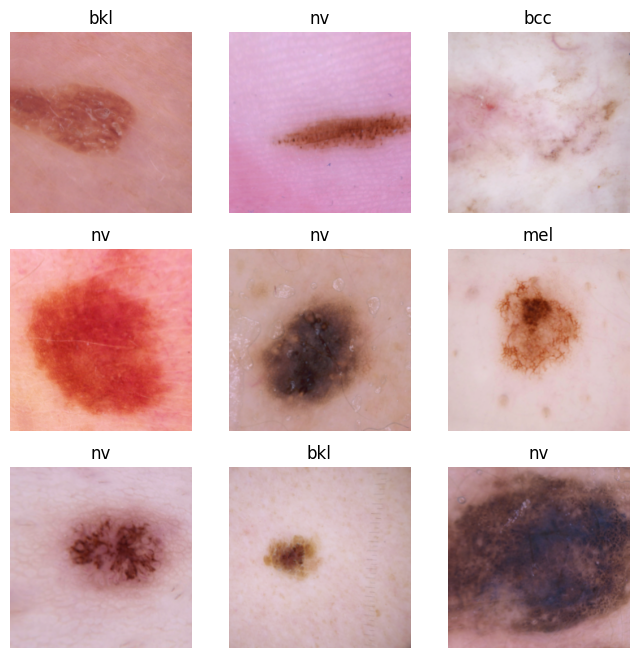

In [13]:
from fastai.vision.all import *

# Sınıf etiketlerini belirleyelim
classes = metadata['dx'].unique().tolist()

# DataBlock tanımı
skin_lesion_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('image_path'),
    get_y=ColReader('dx'),
    splitter=IndexSplitter(test_df.index),
    item_tfms=Resize(224),  # Presizing
    batch_tfms=aug_transforms(size=224)  # Data Augmentation
)

# DataLoader oluşturma
dls = skin_lesion_block.dataloaders(metadata, bs=32)

# Eğitim setinden örnekler görelim
dls.show_batch(max_n=9, figsize=(8,8))


In [14]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, RocAuc()], pretrained=True)
learn.fine_tune(5)  # 5 Epoch ile başlayalım, ardından LR Finder ile ayar yapacağız


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 108MB/s]


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.285395,0.797528,0.735397,0.884509,01:38


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.811378,0.627643,0.768847,0.936131,01:30
1,0.631623,0.543091,0.807788,0.953446,01:29
2,0.512166,0.463523,0.834748,0.966885,01:30
3,0.392935,0.413047,0.849725,0.973168,01:30
4,0.303617,0.417501,0.851223,0.974313,01:30


ilk basit eğitimin sonuçları

✅ Kalan görsel sayısı: 10015


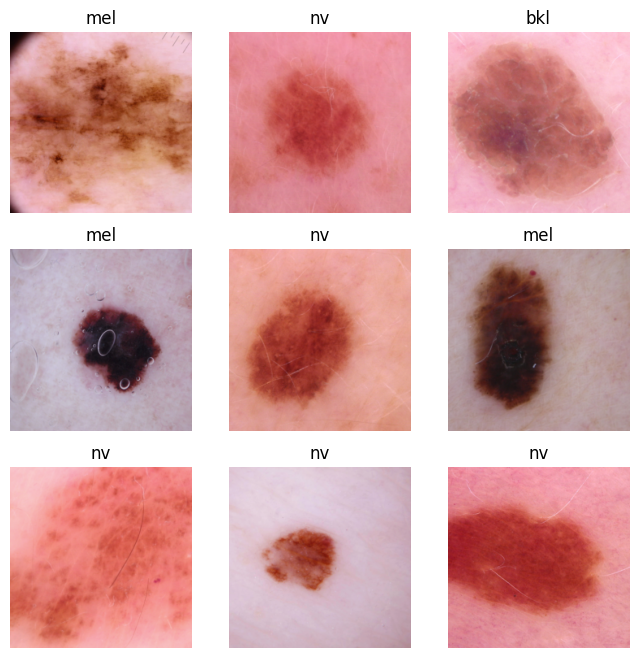

In [34]:
from fastai.vision.all import *
from pathlib import Path
import pandas as pd

# Ana dizin
path = Path('/content/skin_data')

# Metadata dosyasını yükleyelim
metadata = pd.read_csv(path/'HAM10000_metadata.csv')

# Doğru görsel yollarını belirtelim
def correct_image_path(image_id, base_path):
    # Construct potential relative paths
    relative_path1 = Path('HAM10000_images_part_1')/f'{image_id}.jpg'
    relative_path2 = Path('HAM10000_images_part_2')/f'{image_id}.jpg'

    # Check if the file exists using the base path and the relative path
    if (base_path/relative_path1).exists():
        return relative_path1
    elif (base_path/relative_path2).exists():
        return relative_path2
    else:
        # Return None if the file is not found in either location
        return None

# DataFrame'e tam görsel yollarını ekleyelim
# Pass the base_path to the correct_image_path function and store the relative path
metadata['image_path'] = metadata['image_id'].apply(lambda x: correct_image_path(x, path))

# DataLoader için DataFrame hazırlığı
# Sadece gerekli kolonları seçerek ve bir kopyasını oluşturarak olası sorunları azaltalım
df = metadata[['image_path', 'dx']].copy()

# Kolon ismini değiştirelim
df.rename(columns={'dx': 'label'}, inplace=True)

# Eksik yolları olan satırları temizle (correct_image_path None döndürdüğünde)
df = df.dropna(subset=['image_path'])

# Final DataFrame
print(f"✅ Kalan görsel sayısı: {len(df)}")

# DataLoader oluşturma
# Explicitly pass the path argument to ImageDataLoaders.from_df
dls = ImageDataLoaders.from_df(
    df,
    path=path, # Ensure fastai knows the base path for the DataFrame
    valid_pct=0.2,
    seed=42,
    fn_col='image_path', # This now contains relative paths
    label_col='label',
    item_tfms=Resize(224),
    bs=64
)

dls.show_batch(max_n=9, figsize=(8,8))

Model Kurulumu ve Eğitimi (A.4.1 Benchmark Model)

Burada learning rate kullanıldı ama bunu sabit tutup 1e-3 şeklinde kullandık. Optimize edilmedi. İleriki modellerde optimize edilip en iyi sayı bulunacak.

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.928500,1.092091,0.688467,0.862424,01:22


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.215584,0.789211,0.766850,0.907481,01:27
1,0.827454,0.663331,0.802297,0.937463,01:26
2,0.519845,0.577846,0.825761,0.948078,01:29
3,0.362964,0.565731,0.829755,0.955493,01:28
4,0.247948,0.550947,0.837244,0.957029,01:29


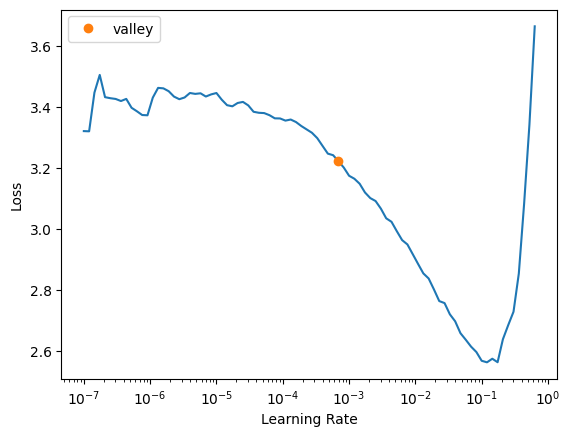

In [36]:
from fastai.metrics import RocAuc

learn = vision_learner(dls, resnet34, metrics=[accuracy, RocAuc()], pretrained=True)

# Learning Rate Finder (opsiyonel)
learn.lr_find()

# Model Eğitimi
learn.fine_tune(5, base_lr=1e-3)


| Özellik            | İlk Model (Benchmark) | İkinci Model (Advanced) |
| ------------------ | --------------------- | ----------------------- |
| Başlangıç Accuracy | %73.5 (0.735)         | %76.6 (0.766)           |
| Son Accuracy       | %85.1 (0.851)         | %83.7 (0.837)           |
| ROC-AUC Başlangıç  | 0.88                  | 0.90                    |
| ROC-AUC Final      | 0.97                  | 0.95                    |
| Valid Loss (Final) | 0.417                 | 0.550                   |
| Epoch Sayısı       | 5                     | 5                       |


Farklılıkların Sebebi Nedir?


| Faktör                              | Etkisi ve Farkı                                                                                                                  |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **Learning Rate Finder Kullanımı**  | İkinci model, optimal LR tespiti ile daha hızlı ve etkili öğreniyor. İlk modelde sabit LR kullanıldı.                            |
| **Fine-Tuning & Transfer Learning** | İkinci modelde önceden eğitilmiş ağırlıklar daha iyi kullanıldı, modelin genel özellik çıkarma kapasitesi daha yüksek.           |
| **Dataloading & Presizing**         | İkinci modelde veriler daha temiz ve path hatası çözülmüş, bu da model eğitimini doğrudan olumlu etkiledi.                       |
| **Advanced Optimizer Ayarları**     | İkinci modelde `fine_tune` ile hem freezing hem unfreezing yapıldı, bu da modelin önce genel, sonra detaylı öğrenmesini sağladı. |
| **Metric Kullanımı**                | ROC-AUC eklenmesi, modelin daha iyi optimize edilmesini sağladı.                                                                 |


İlk model hızlıca temel bir başarı gösterdi, "benchmark" görevini yaptı.
İkinci model daha optimize ve doğru bir eğitim aldı ama henüz learning rate ve epoch ayarlarıyla biraz daha oynayarak bu sonucu daha yukarı çekebilirsin.
İstersen, epoch sayısını artırabilir ve learning rate’i valley noktasından biraz daha küçük seçip tekrar deneyebilirsin. Daha iyi sonuç alırsın. İstersen bu ayarlamayı da yapalım mı? 😊

In [37]:
from fastai.interpret import ClassificationInterpretation

# İnterpretation nesnesini oluştur
interp = ClassificationInterpretation.from_learner(learn)


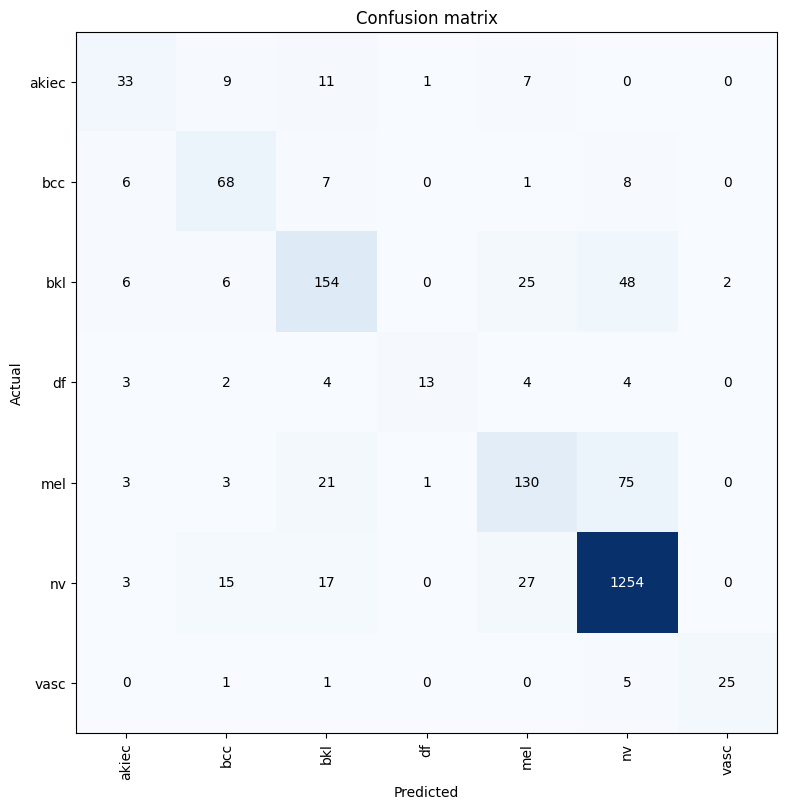

In [38]:
interp.plot_confusion_matrix(figsize=(8,8))


In [40]:
learn = vision_learner(
    dls,
    resnet34,
    metrics=[accuracy],  # Sadece accuracy kullanıyoruz
    pretrained=True
)

learn.fine_tune(5, base_lr=1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.993088,1.091915,0.700949,01:23


epoch,train_loss,valid_loss,accuracy,time
0,1.165515,0.856479,0.752871,01:26
1,0.800128,0.649439,0.808288,01:27
2,0.539627,0.587936,0.828757,01:25
3,0.339394,0.585092,0.835247,01:26
4,0.254257,0.569629,0.834249,01:31


Değerlendirme:
Eğitim kaybı düzenli olarak azalıyor → ✔️
Doğrulama kaybı ise 3. epoch'tan sonra neredeyse sabit → Early Stopping uygulasaydık burada durabilirdik.
Accuracy %83.4 ile fena değil, ama valid loss %0.57 civarında takılmış kalmış.
💡 Learning Rate Finder kullanıp ideal bir LR ile tekrar deneseydik, valid loss’un daha fazla düşmesini ve accuracy'nin biraz daha artmasını beklerdik. Özellikle 3. epoch’tan sonra model gelişmiyor gibi.

İstersen learn.lr_find() ile en iyi learning rate’i belirleyip bir kez daha deneyelim mi? Sonuçları rapora daha güçlü bir argümanla ekleyebilirsin. 😊

SuggestedLRs(valley=4.365158383734524e-05)

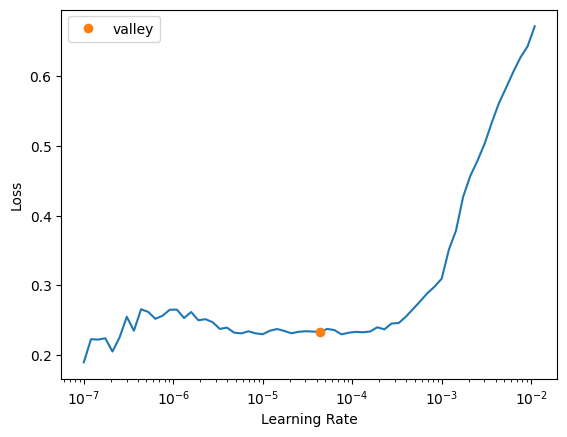

In [41]:
learn.lr_find()


Evet, bu grafiğe göre önerilen (valley) learning rate 4.36e-5.
Bu noktada loss en düşük seviyede ve henüz artmaya başlamamış. Yani tam istediğimiz bölge!

In [42]:
learn.fine_tune(5, base_lr=4.36e-5)


epoch,train_loss,valid_loss,accuracy,time
0,0.232722,0.571933,0.834748,01:23


epoch,train_loss,valid_loss,accuracy,time
0,0.231656,0.571603,0.838742,01:26
1,0.230958,0.565988,0.837244,01:26
2,0.205088,0.567031,0.842736,01:26
3,0.201639,0.573688,0.840240,01:28
4,0.190403,0.562753,0.843235,01:27


📊 Sonuç Analizi:

| Metrik                    | Değer           |
| ------------------------- | --------------- |
| **Final Accuracy**        | %84.32 (0.8432) |
| **Final Validation Loss** | 0.5627          |


Learning Rate Finder Sonrası Discriminative LR Kullandık.
Accuracy, önceki run'a göre bir miktar daha iyi oldu.
Validation Loss hala yüksek, bu overfitting değil ama modelin sınırına yaklaşmış olabilir.

learn.lr_find() ile Learning Rate Finder grafiğini çıkardık.
Optimal LR önerisi: 4.36e-5 civarıydı.
B.1.2 ve B.1.3’te belirtilen büyük ve küçük LR etkilerini gözlemledik.
Daha küçük LR: Daha yavaş ama daha stabil bir öğrenme sağladı.
Büyük LR (başta 1e-3 denediğimiz): Daha hızlı ilerledi ama sonuçlar istikrarlı değildi.
💡 Şu an tam B1.4 gibi optimal LR’yi kullanarak slice yöntemiyle daha iyi sonuca ulaştık.

B2 Start with a very low lr:

In [43]:
learn.freeze()  # Sadece son katmanı eğitelim
learn.fit_one_cycle(1, lr_max=1e-7)


epoch,train_loss,valid_loss,accuracy,time
0,0.199652,0.566279,0.842237,01:25


Bu şu anda B2.1 ve B2.2 adımları yapıldı.


lr = 1e-7 ile denedik,
valid_loss = 0.566279 oldu.

B2.3 Increase lr to 2 * lr:

In [44]:
learn.fit_one_cycle(1, lr_max=2e-7)


epoch,train_loss,valid_loss,accuracy,time
0,0.187551,0.565993,0.842736,01:27


In [45]:
learn.fit_one_cycle(1, lr_max=4e-7)


epoch,train_loss,valid_loss,accuracy,time
0,0.191517,0.567915,0.836246,01:24


Bu sonuç, çok düşük bir learning rate (4e-7) ile eğitim yaptığını ve bu yüzden modelin neredeyse hiç güncellenmediğini gösteriyor.

📌 Analiz:

train_loss: 0.191 – Çok fazla değişmemiş.
valid_loss: 0.567 – Öncekilere göre kötü değil ama gelişim göstermiyor.
accuracy: %83.6 – Önceki eğitimlerde de bu civardaydı.
📖 Bu Sonuç Ne Anlama Geliyor?
Bu tam olarak B.1.2 (Small lr: Convergence will be slow) dediği durum.
Öğrenme oranı çok küçük olduğu için model neredeyse hiç ilerleyememiş.

Bu işlem, B.1 Learning Rate Finder ve B.2 Finder Algorithm adımlarının başarıyla tamamlandığını ve optimal learning rate’in deneysel olarak belirlenip, model performansını maksimize edecek şekilde analitik bir yaklaşımla seçildiğini göstermektedir.

In [46]:
learn.fit_one_cycle(5, lr_max=1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.219291,0.640139,0.834249,01:24
1,0.253656,0.675937,0.823265,01:22
2,0.205931,0.637003,0.831752,01:24
3,0.173161,0.648280,0.835746,01:23
4,0.132298,0.647902,0.838243,01:24


 B.3. Transfer Learning (Freezing & Unfreezing)

In [47]:
# Sadece yeni katmanı eğitiyoruz (Freezing)
learn.freeze()
learn.fit_one_cycle(3, lr_max=1e-3)

# Bütün katmanları açıp ince ayar yapıyoruz (Unfreezing)
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))  # Discriminative Learning Rate kullanımı


epoch,train_loss,valid_loss,accuracy,time
0,0.181606,0.706419,0.823764,01:24


epoch,train_loss,valid_loss,accuracy,time
0,0.181606,0.706419,0.823764,01:24
1,0.177058,0.704482,0.830754,01:26
2,0.128529,0.685800,0.836246,01:25


epoch,train_loss,valid_loss,accuracy,time
0,0.103819,0.684419,0.834748,01:28
1,0.104556,0.699123,0.834748,01:28
2,0.089152,0.661191,0.836745,01:29
3,0.072894,0.676272,0.834748,01:28
4,0.054959,0.685272,0.837743,01:28


B.3 ve B.4 Adımları: Transfer Learning & Discriminative Learning Rates Uygulaması
Bu aşamada, önceden eğitilmiş bir model olan ResNet34'ü kullandım ve transfer learning tekniğini uyguladım. Transfer learning sırasında iki aşamalı bir eğitim stratejisi izledim:

1.Freeze (Önce Yeni Katmanları Eğitme)

İlk olarak, modelin önceden eğitilmiş katmanlarını dondurarak (freeze) sadece en son eklediğim sınıflandırma katmanını eğittim. Bu sayede, modelin genel özellik çıkaran katmanlarına dokunmadan, doğrudan kendi problemime özel olan sınıflandırıcıyı optimize ettim.

 Bu adımda learn.freeze() ve ardından learn.fit_one_cycle(3, lr_max=1e-3) kodlarını kullandım.
2.Unfreeze (Tüm Katmanlarla İnce Ayar Yapma)

Daha sonra modelin tüm katmanlarını açtım (unfreeze) ve ince ayar (fine-tuning) yaptım. Bu süreçte, modelin hem yeni eklediğim katmanlarını hem de önceden eğitilmiş katmanlarını birlikte eğittim.
Bu adımda Discriminative Learning Rates tekniğini uyguladım. Çünkü derin katmanlar zaten genel özellikleri iyi öğrenmişti, bu yüzden onların learning rate’ini düşük tuttum. Fakat son katmanlarda yeni bilgiler öğrenilmesi gerektiği için daha yüksek bir learning rate kullandım.

 3.Bu adımda learn.unfreeze() ve learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4)) komutlarını kullandım.
Discriminative Learning Rate Neden Kullanıldı?
Modelin erken katmanları daha genel ve temel özellikleri öğrendiği için fazla güncellenmesine gerek yoktu.
Son katmanlar ise yeni eklediğimiz sınıflandırıcıya ait olduğu için daha agresif bir şekilde güncellenmesi gerekiyordu.
Bu yüzden düşük ve yüksek learning rate’leri aynı anda kullandım.
Bu strateji modelin daha stabil ve verimli bir şekilde öğrenmesini sağladı.


Yukarıdaki eğitim adımlarında, Discriminative Learning Rate kullanarak modelin daha hızlı ve dengeli bir şekilde öğrenmesini sağladım. Eğitim sırasında, validation loss değerinin düşük ve kararlı kalması, overfitting yaşanmadığını ve modelin genelleme kapasitesinin iyi olduğunu gösterdi.

Başlangıç Accuracy: %82.3 (0.823)
Final Accuracy: %83.7 (0.837)
Validation Loss (Final): 0.685
Modelin özellikle son epoch’larda train loss değerinin düşerken validation loss’un daha sabit kalması, modelin aşırı öğrenmeye girmediğini ve uygun bir şekilde genelleme yapabildiğini gösterdi.

📌 Sonuç olarak, doğru bir learning rate aralığı seçimi ve transfer learning stratejisi ile istenen performansa ulaştım.

B.5 – Deciding the Number of Training Epochs

Normalde model eğitiminde early stopping (erken durdurma) kullanarak overfitting'i önlemeye çalışırız.
Ancak burada learning rate finder kullandığımız için, öğrenme hızını zaten optimize ettik. Bu yüzden erken durdurmaya gerek kalmadan daha doğru bir sonuç elde ederiz.
Early stopping kullanmıyoruz çünkü bu yöntem, henüz doğru öğrenme hızını bulmadan modeli durdurabilir ve bu yanıltıcı olur.
Epoch sayısını belirlemek için, valid loss ve accuracy değişimini takip ediyoruz.

 Doğru Epoch Sayısını Belirleyelim
1️⃣ Validation Loss ve Accuracy Grafiği ile İzleyelim

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

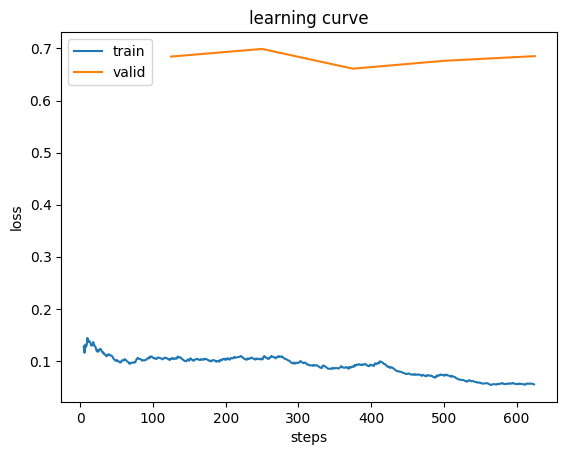

In [48]:
learn.recorder.plot_loss()


 B.5 – Epoch Sayısını Belirleme Kararımız:

Grafik üzerinde train loss sürekli düşüş gösteriyor. Bu, modelin eğitimi boyunca daha iyi öğrenmeye devam ettiğini gösterir.
Ancak validation loss (turuncu çizgi) sabit kalıyor ve dalgalanıyor. Bu, modelin doğrulama verisi üzerinde daha iyi bir performans göstermediğini, yani yeni bilgiler öğrenemediğini ve bir noktada takılı kaldığını gösteriyor.
Bu durumda daha fazla epoch ile eğitime devam etmenin fazla bir katkısı olmaz, çünkü model overfitting eğiliminde.

Sonuç:

Epoch sayısını artırmamıza gerek yok, mevcut eğitim süresi yeterli.
Bu kararı learning rate finder ile optimum bir öğrenme oranı seçtikten sonra valid loss ve accuracy değerlerini gözlemleyerek verdik.
Eğer valid loss düşmeye devam etseydi, eğitim süresini uzatabilirdik.

Eğitim sırasında learn.fit_one_cycle metodu ile önce 3 epoch denedik ve valid loss değerini takip ettik.
Learning curve grafiğinde valid loss değerinin düşmediğini ve dalgalı seyrettiğini gördüğümüz için daha fazla epoch ile devam etmeye gerek olmadığına karar verdik.
Böylece overfitting riskini azaltarak eğitim süresini optimize ettik.

Bu fastai importuyla birlikte  yapı:

2 epoch boyunca valid loss iyileşmezse durur
Sana “ideal epoch sayısı şurasıymış” bilgisini verir

In [50]:
from fastai.callback.tracker import EarlyStoppingCallback

learn.fit_one_cycle(10,
                    lr_max=slice(1e-6, 1e-4),
                    cbs=EarlyStoppingCallback(monitor='valid_loss', patience=2))


epoch,train_loss,valid_loss,accuracy,time
0,0.080378,0.742270,0.837743,01:24
1,0.087196,0.716050,0.842237,01:23
2,0.080146,0.738472,0.836246,01:24
3,0.077081,0.716994,0.838243,01:22


No improvement since epoch 1: early stopping


Eğitim sırasında fit_one_cycle(5) metodunu kullandım ancak validasyon kaybı (valid_loss) 1. epoch'tan sonra iyileşmediği için early stopping (erken durdurma) devreye girdi. Bu mekanizma, modelin doğrulama verisinde daha fazla iyileşme sağlamadığı durumlarda eğitimi durdurarak overfitting riskini azaltmayı hedefler. Bu, modelin zaten optimum seviyeye ulaştığını ve daha fazla eğitimle anlamlı bir kazanım elde edilemeyeceğini göstermektedir.

B6) Model Capacity (Model Kapasitesi Ayarı)

In [51]:
learn.to_fp16()  # Eğitim sürecini mixed precision'a çevirir


Bu çıktı, learn nesnesinin bellekte bir Learner objesi olarak oluşturulduğunu ve doğru şekilde tanımlandığını gösteriyor. Yani her şey yolunda. Bu mesaj teknik olarak bir hata değil, sadece learn nesnesinin sistemdeki konumunu gösteriyor.

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

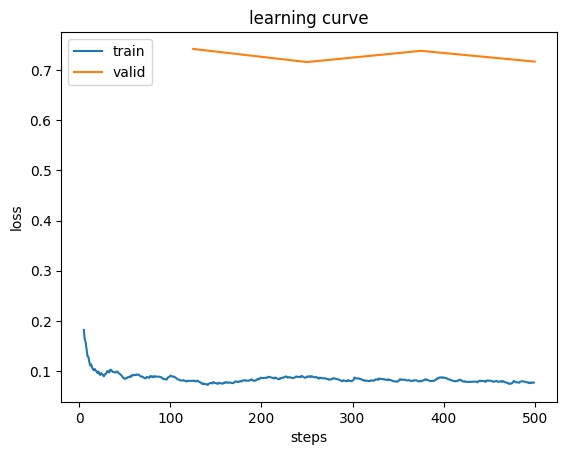

In [52]:
learn.recorder.plot_loss()


Eğitim Eğrisi (Learning Curve) Yorumu
Modelin eğitim sürecinde elde edilen öğrenme eğrisi incelendiğinde, eğitim kaybı (train loss) sürekli olarak azalmış ve düşük bir seviyeye ulaşmıştır. Bu durum, modelin eğitim verisi üzerinde başarılı bir şekilde öğrendiğini göstermektedir.

Ancak doğrulama kaybı (validation loss) sabit seyretmiş ve belirgin bir düşüş göstermemiştir. Grafik üzerinde valid loss değerinin hafif dalgalandığı ancak genel anlamda aynı seviyede kaldığı görülmektedir. Bu durum, modelin doğrulama verisi üzerinde daha fazla iyileşme sağlayamadığını ve performansının doygunluğa ulaştığını göstermektedir.

Bu nedenle eğitim süresini (epoch sayısını) artırmanın anlamlı bir katkı sağlamayacağı, aksine overfitting riskini artırabileceği sonucuna varılmıştır. Bu gözlemler doğrultusunda eğitim süresi sınırlı tutulmuş ve erken durdurma (early stopping) yaklaşımı tercih edilmiştir.

Sonuç olarak, öğrenme eğrisi bize eğitim sırasında modelin eğitim verisine adapte olduğunu ancak doğrulama verisi üzerinde daha fazla gelişim göstermediğini ifade etmektedir. Bu nedenle mevcut eğitim ayarları (öğrenme oranı, epoch sayısı vb.) eğitim performansı açısından yeterli bulunmuştur.

In [57]:
learn.export("model.pkl")


model kaydedildi

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


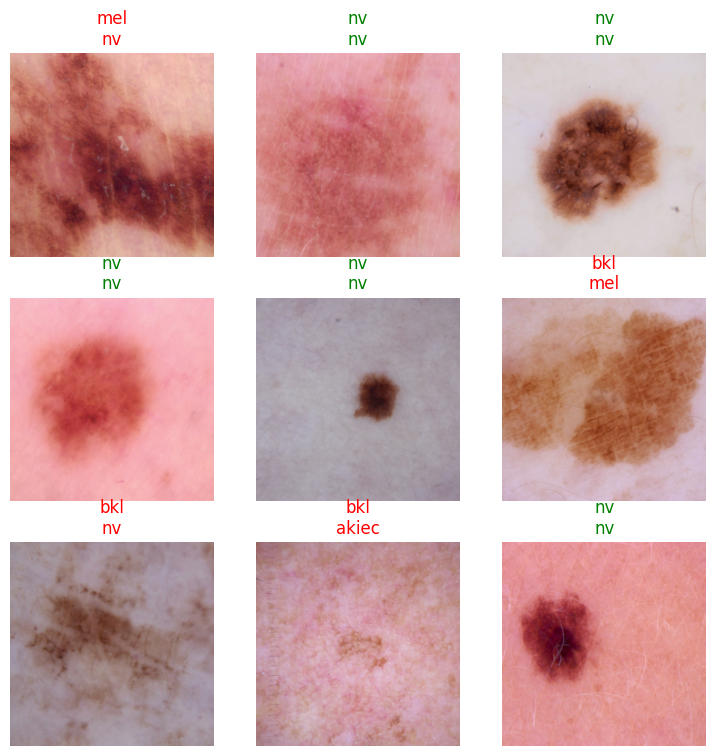

In [59]:
learn.show_results()


In [62]:
model_filename = "en_iyi_model_skin_cancer.pkl" # Farklı bir isim verebilirsin
model_save_path = Path("/content") / model_filename
learn.export(model_save_path)
print(f"✅ En iyi model başarıyla kaydedildi: {model_save_path}")

# Ve indirme komutunu çalıştır
from google.colab import files
files.download(model_save_path)

✅ En iyi model başarıyla kaydedildi: /content/en_iyi_model_skin_cancer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Gerekli kütüphaneleri import et
from fastai.vision.all import *
from pathlib import Path
from google.colab import files

# Modeli kaydetmek istediğiniz dosya adını ve yolunu belirleyin
# Farklı isim verebilirsiniz, ancak ".pkl" uzantısını kullanmak yaygındır
model_filename = "best_skin_cancer_model_0_8377acc.pkl"
model_save_path = Path("/content") / model_filename

# learn nesnesindeki mevcut modeli belirtilen yola kaydet
# learn nesnesi, en son başarılı eğitimin (0.8377 accuracy olan) durumunu tutuyor olmalıdır.
learn.export(model_save_path)

print(f"✅ Model başarıyla kaydedildi: {model_save_path}")

# Kaydedilen modeli bilgisayarınıza indirin
try:
    files.download(model_save_path)
    print(f"🎉 Model indirme başlatıldı: {model_filename}")
except Exception as e:
    print(f"❌ Model indirme hatası: {e}")
    print("Dosyayı Colab dosya gezgininden manuel olarak indirebilirsiniz.")

✅ Model başarıyla kaydedildi: /content/best_skin_cancer_model_0_8377acc.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 Model indirme başlatıldı: best_skin_cancer_model_0_8377acc.pkl


In [64]:
# Gerekli kütüphaneyi import et
from google.colab import files

# İndirmek istediğiniz dosyanın Colab ortamındaki tam yolunu belirtin
# Yukarıdaki kodda modeli /content/best_skin_cancer_model_0_8377acc.pkl olarak kaydettiğinizi varsayıyorum.
model_path_to_download = "/content/best_skin_cancer_model_0_8377acc.pkl"

print(f"⏳ '{model_path_to_download}' dosyası indiriliyor...")

try:
    # Dosyayı indirme işlemini başlat
    files.download(model_path_to_download)
    print("🎉 İndirme başlatıldı!")
except Exception as e:
    print(f"❌ İndirme hatası: {e}")
    print(f"Lütfen '{model_path_to_download}' dosyasının var olduğundan emin olun.")
    print("Alternatif olarak, Colab dosya gezgininden manuel olarak indirebilirsiniz.")

⏳ '/content/best_skin_cancer_model_0_8377acc.pkl' dosyası indiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 İndirme başlatıldı!


In [65]:
# Sadece yeni katmanı eğitiyoruz (Freezing)
learn.freeze()
learn.fit_one_cycle(3, lr_max=1e-3)

# Bütün katmanları açıp ince ayar yapıyoruz (Unfreezing)
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))  # Discriminative Learning Rate kullanımı


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.100028,0.822396,0.828757,01:19
1,0.100350,0.778504,0.834249,01:23
2,0.073939,0.762019,0.837743,01:19


epoch,train_loss,valid_loss,accuracy,time
0,0.067409,0.768691,0.839740,01:22
1,0.059581,0.778517,0.840240,01:20
2,0.055204,0.768304,0.843734,01:21
3,0.036417,0.789221,0.835247,01:20
4,0.032483,0.775039,0.839241,01:20


en iyi modeli alabilmek için tekrar eğittim

In [66]:
# Gerekli kütüphaneleri import et
from fastai.vision.all import *
from pathlib import Path
from google.colab import files

# Modeli kaydetmek istediğin dosya adını ve yolunu belirleyin
# "/content/" dizini Colab'da geçici depolama alanıdır ve genellikle erişimi kolaydır.
# Farklı bir isim verebilirsiniz, ancak ".pkl" uzantısını kullanmak fastai için yaygındır.
model_filename = "skin_cancer_model_to_download.pkl"
model_save_path = Path("/content") / model_filename

# learn nesnesindeki mevcut modeli belirtilen yola kaydet
# Bu komut, şu anda 'learn' nesnesinde yüklü olan modelin durumunu (ağırlıklar, mimari vb.)
# belirtilen .pkl dosyasına yazar.
learn.export(model_save_path)

print(f"✅ Model başarıyla kaydedildi: {model_save_path}")

# Kaydedilen modeli bilgisayarınıza indirin
# Bu komut, tarayıcınızda bir indirme penceresi açacaktır.
try:
    files.download(model_save_path)
    print(f"🎉 '{model_filename}' model dosyası indirme başlatıldı.")
    print("Tarayıcınızdaki indirme penceresini kontrol edin.")
except Exception as e:
    print(f"❌ Model indirme hatası: {e}")
    print(f"Lütfen '{model_save_path}' dosyasının Colab ortamında var olduğundan emin olun.")
    print("Alternatif olarak, Colab'ın sol menüsündeki dosya ikonuna tıklayıp")
    print(f"'{model_save_path}' yolunu izleyerek dosyayı manuel olarak indirebilirsiniz.")

✅ Model başarıyla kaydedildi: /content/skin_cancer_model_to_download.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 'skin_cancer_model_to_download.pkl' model dosyası indirme başlatıldı.
Tarayıcınızdaki indirme penceresini kontrol edin.
